# Web traffic time series forecast

In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train1 = pd.read_csv("/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip", parse_dates=True)

In [3]:
train1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
train1.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

## Data Visualization

In [5]:
train_pivot = train1.melt(id_vars='Page', var_name='Date', value_name='Visits')

In [6]:
train_pivot['Date'] = pd.to_datetime(train_pivot['Date'])

In [7]:

train_pivot['Year'] = train_pivot['Date'].dt.year
train_pivot['Month'] = train_pivot['Date'].dt.month
train_pivot['Day'] = train_pivot['Date'].dt.day

In [8]:
def visualize_visits(df, groupby, figsize, title, **kwargs):
    plt.figure(figsize=figsize)
    group_by = df[[groupby, 'Visits', 'Page']].groupby([groupby])['Visits'].mean()
    plt.plot(group_by, **kwargs)
    plt.title(title)
    plt.show()

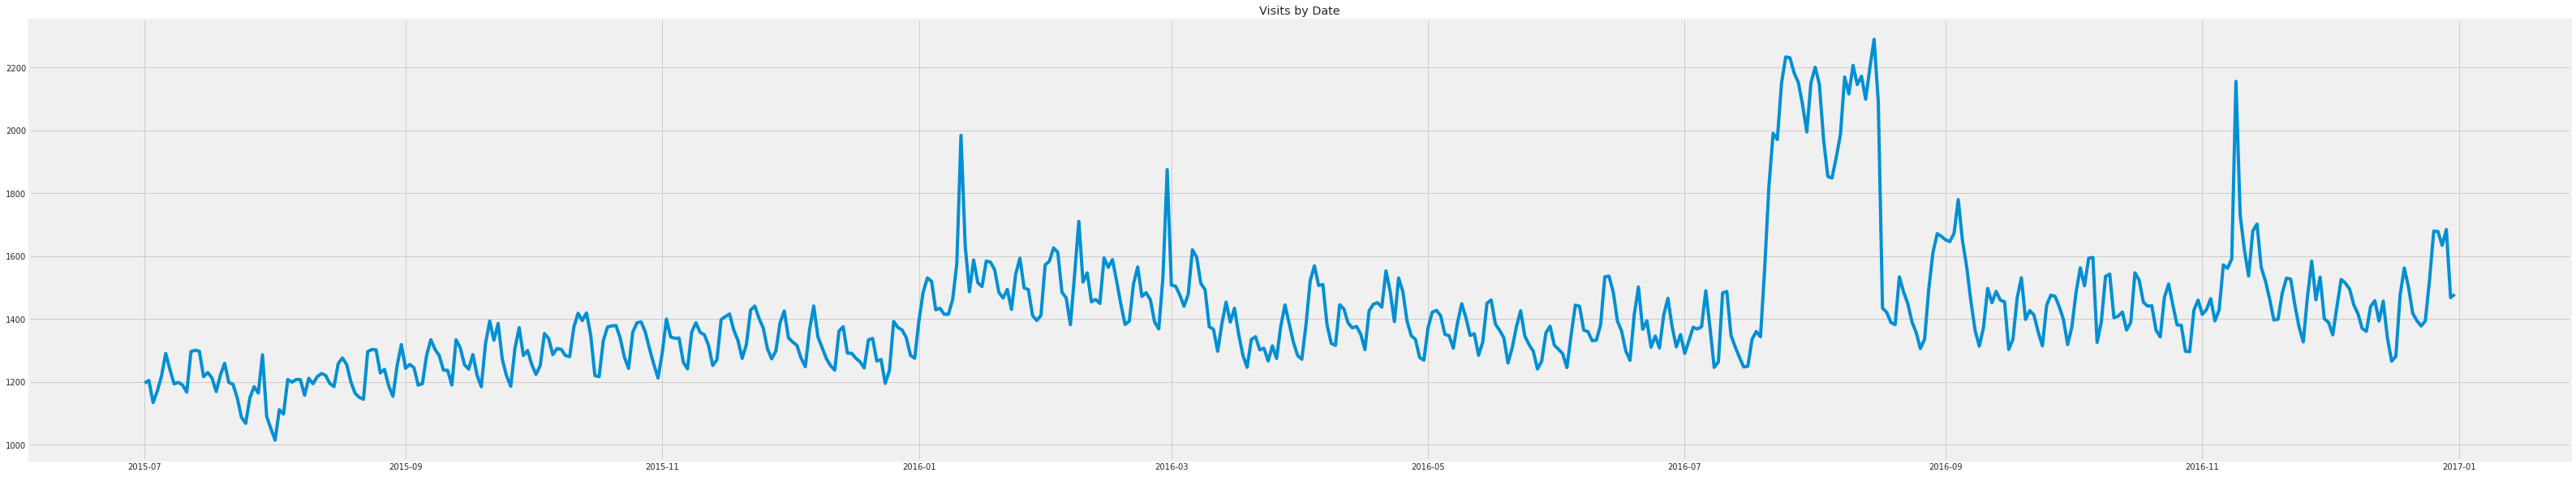

In [9]:
visualize_visits(train_pivot, 'Date', (50, 10), 'Visits by Date')

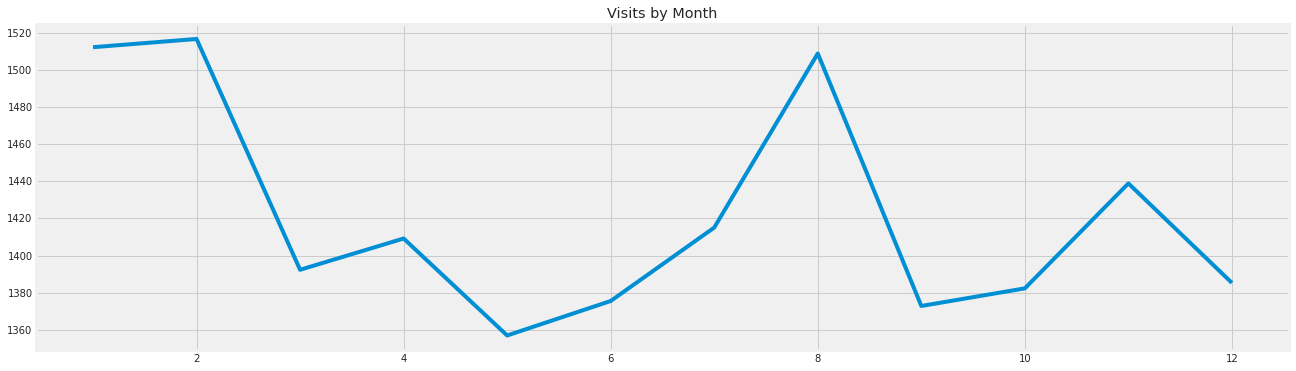

In [11]:
visualize_visits(train_pivot, 'Month', (20, 6), title='Visits by Month')

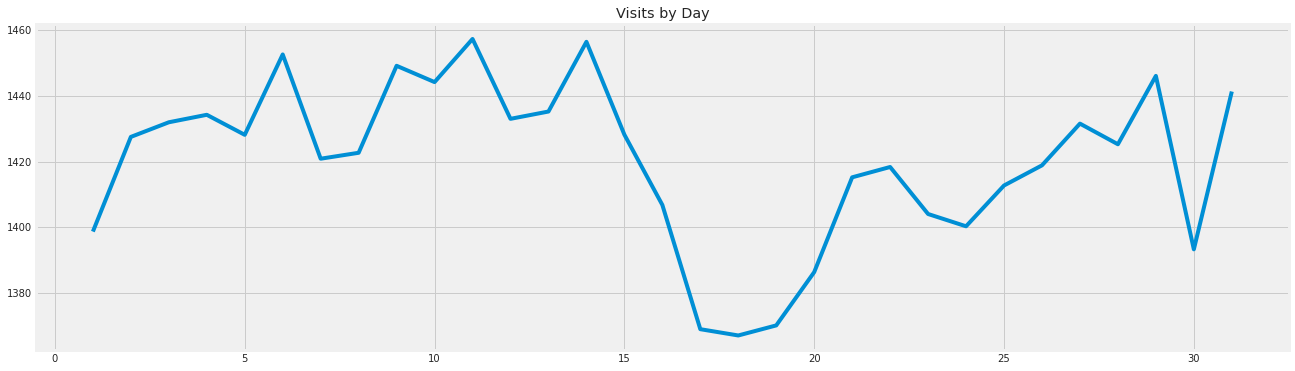

In [12]:
visualize_visits(train_pivot, 'Day', (20, 6), 'Visits by Day')

## Page with most Visits

In [13]:
page_visits = train_pivot[['Page', 'Visits']].groupby('Page')['Visits'].sum().sort_values(ascending=False)
page_visit = pd.DataFrame({'Page':page_visits.index, 'Visits':list(page_visits)})

In [14]:
name = []
for page in page_visit['Page']:
    split = page.split('.')
    name.append(split[-3])

In [15]:
page_visit['Name'] = name
page_visit['Language'] = page_visit['Name'].str[-2:]

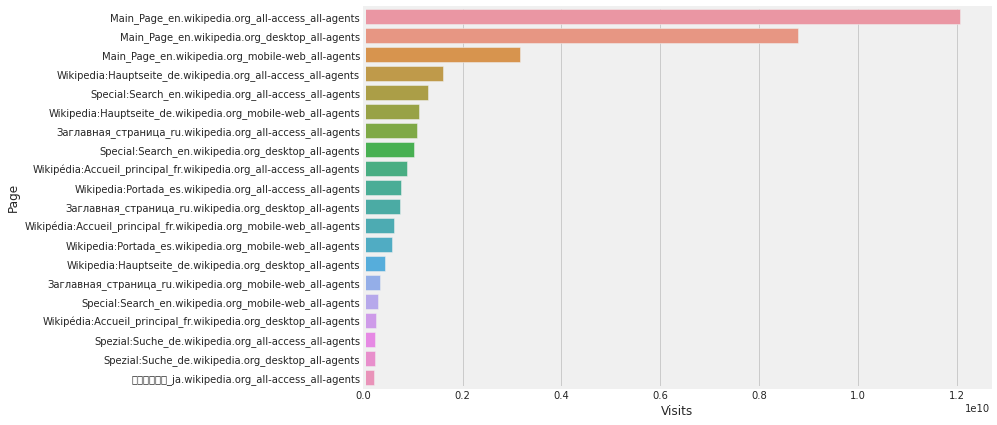

In [16]:
plt.figure(figsize=(10, 7))
top=20
top_visit = page_visit.iloc[:top]
sns.barplot(data=top_visit, y='Page', x='Visits');

## Visualize Access agent, Language and project

In [17]:
name = []
project = []
access_agent = []

for page in train1['Page']:
    split = page.split('.')
    name.append(split[-3])
    project.append(split[-2])
    access_agent.append(split[-1])

In [18]:
train1['Name'] = name
train1['Project'] = project
train1['access_agent'] = access_agent
train1['Language'] = train1['Name'].str[-2:]

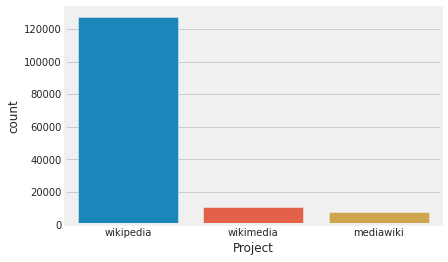

In [19]:
sns.countplot(train1['Project']);

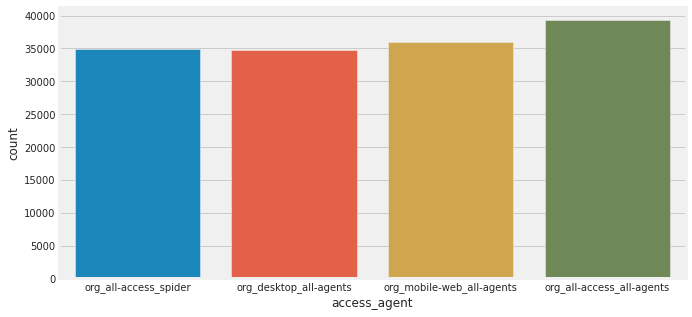

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(train1['access_agent']);

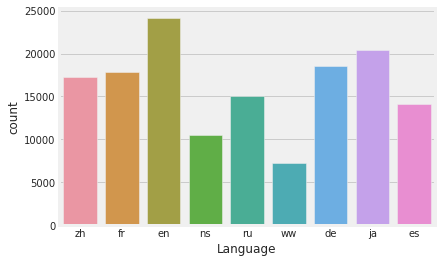

In [21]:
sns.countplot(train1['Language']);

## Visualize the visits by language

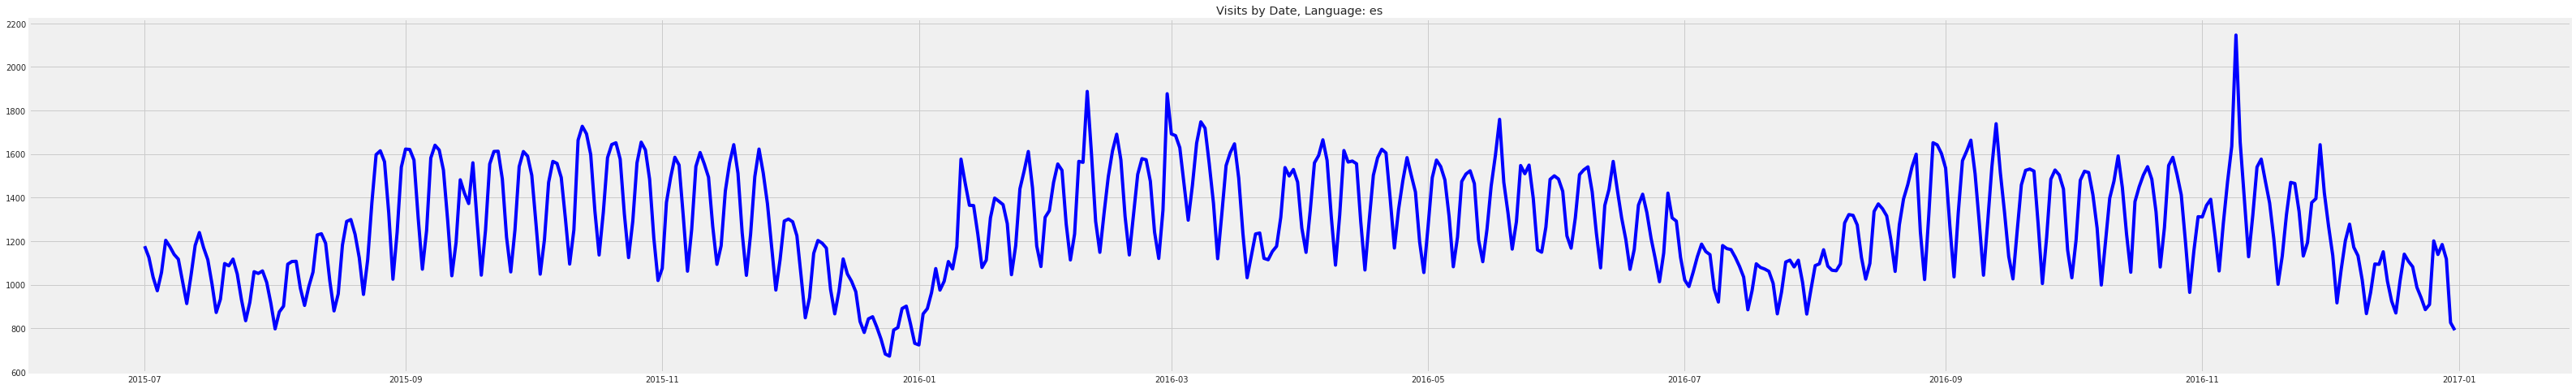

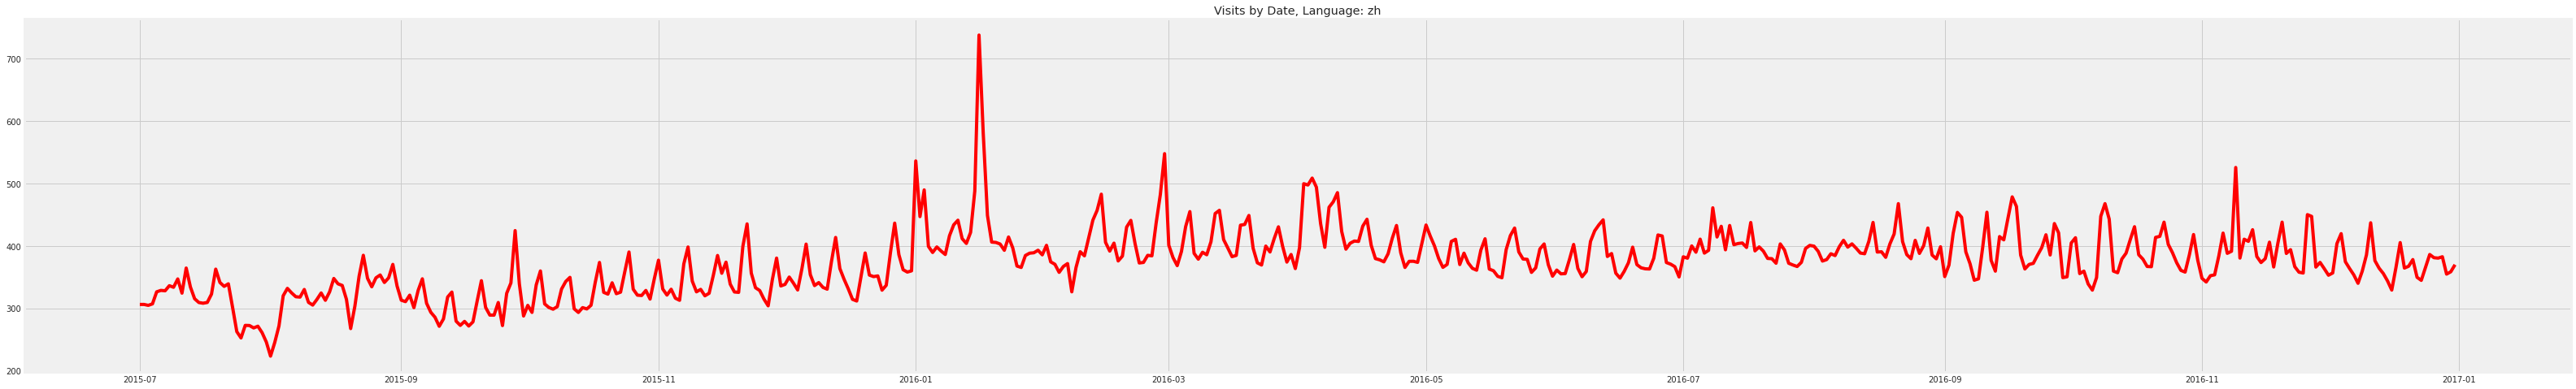

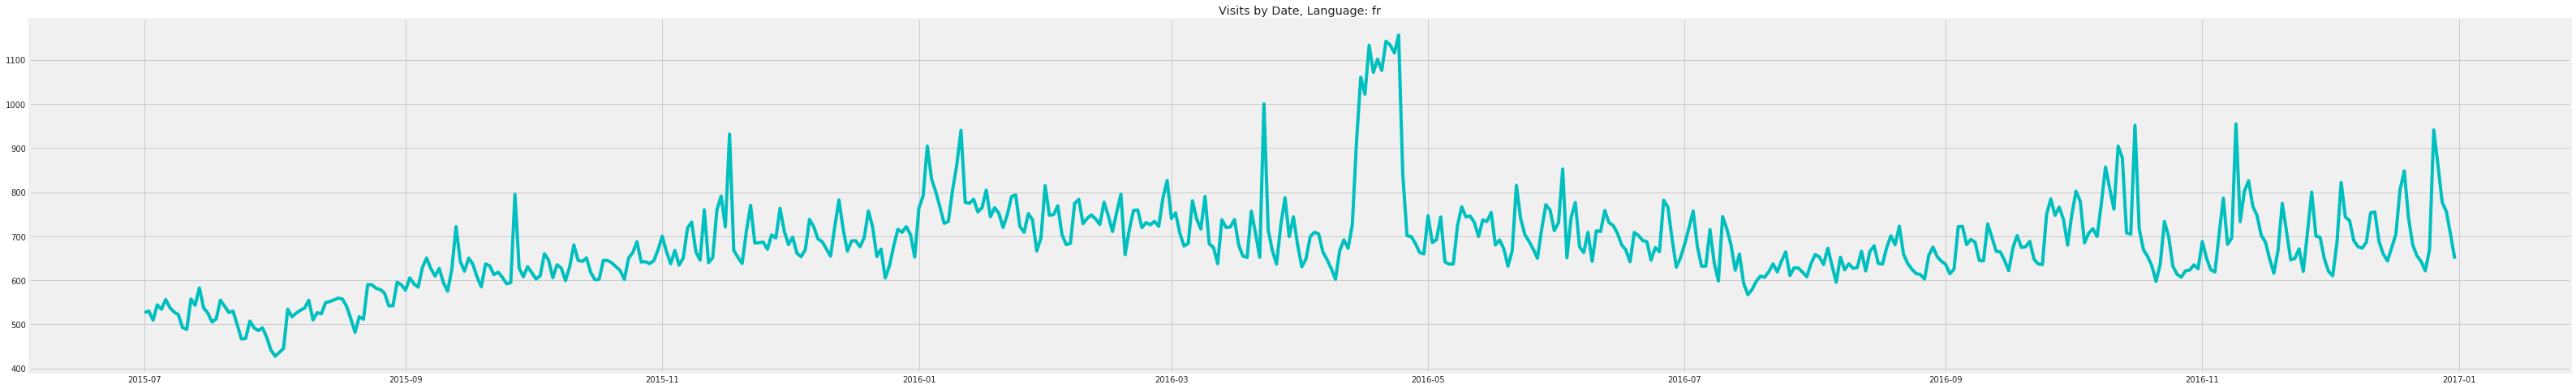

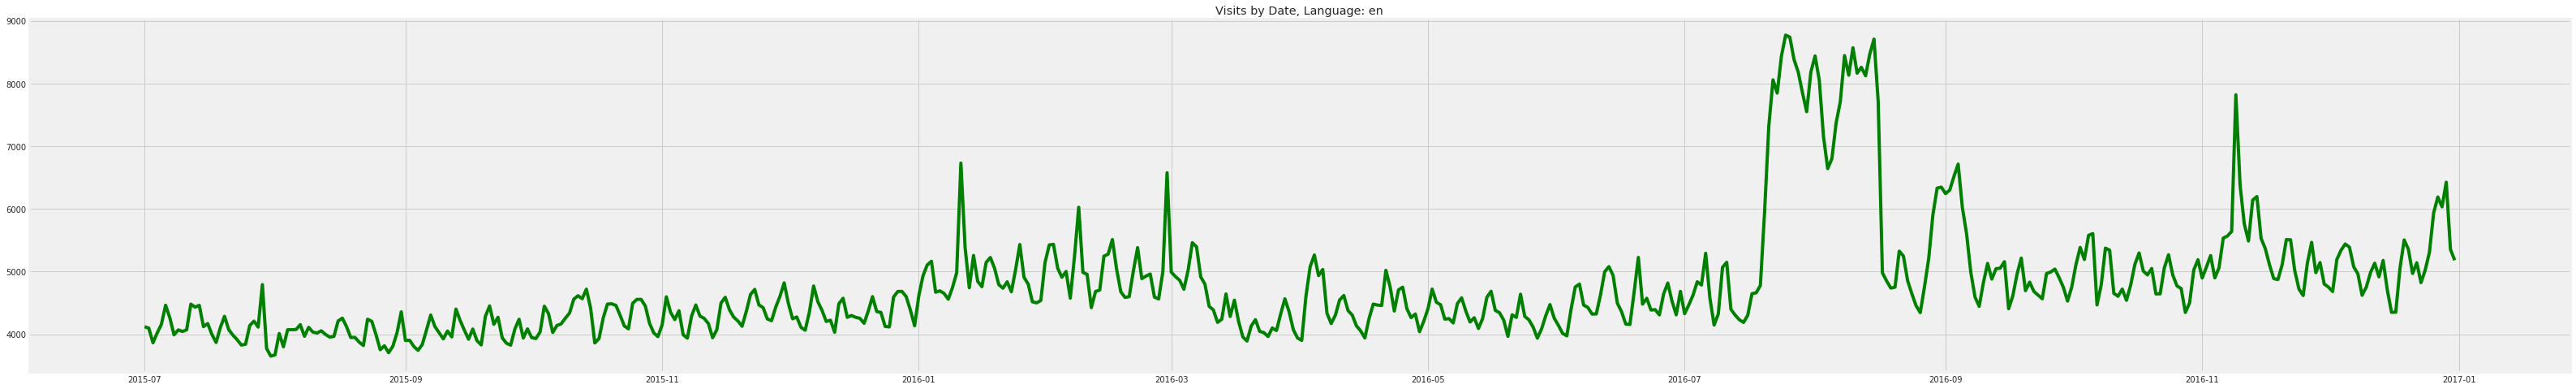

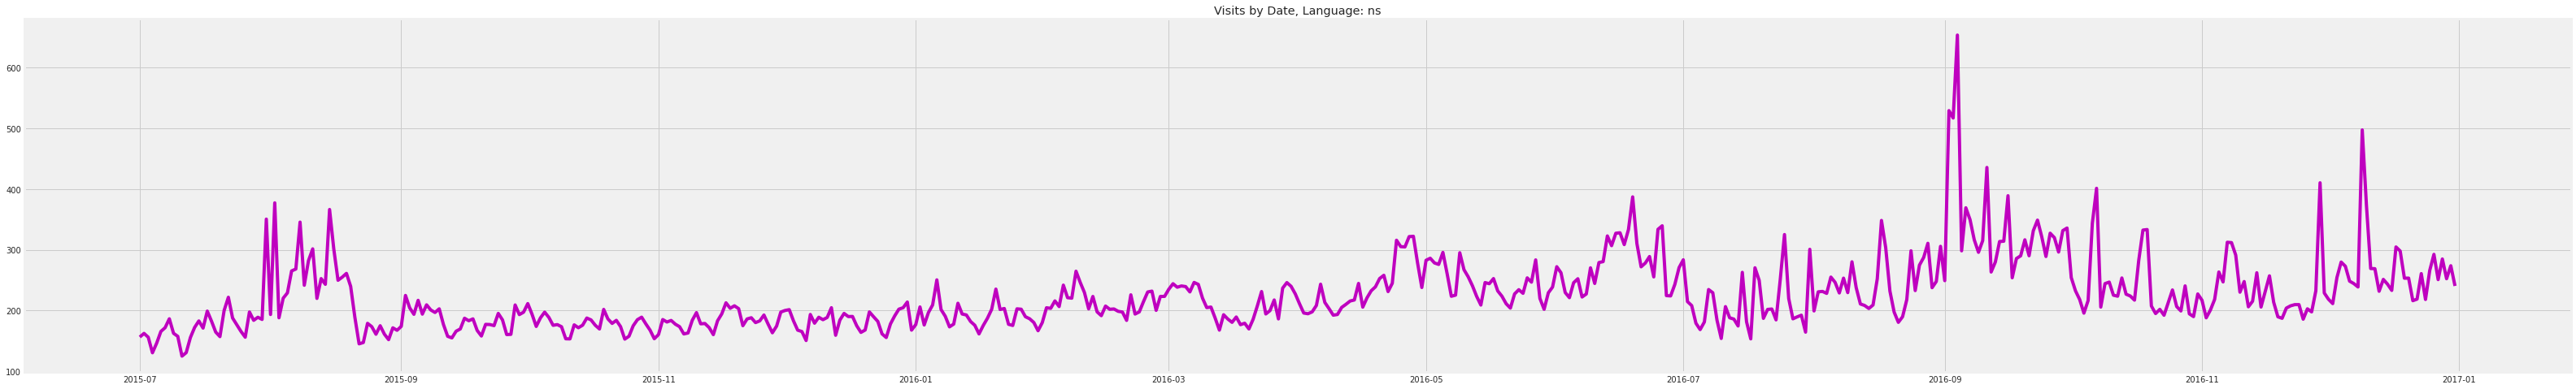

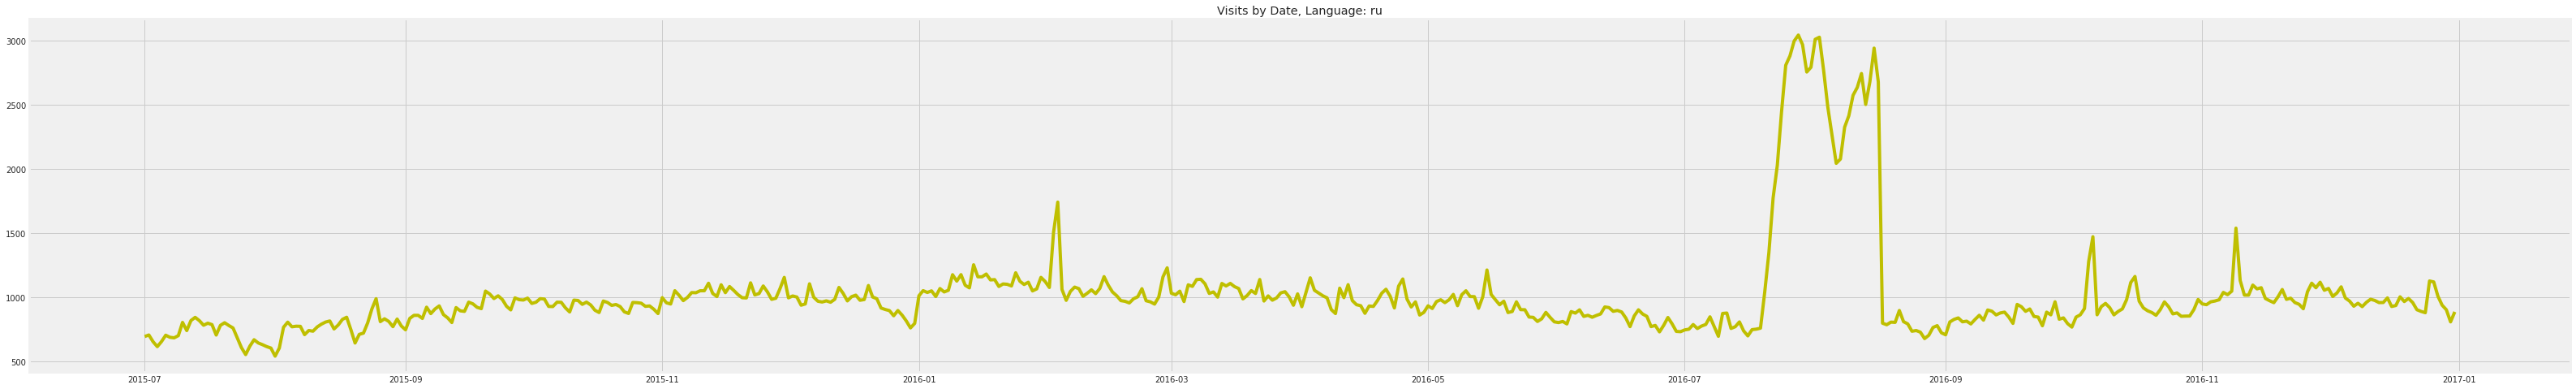

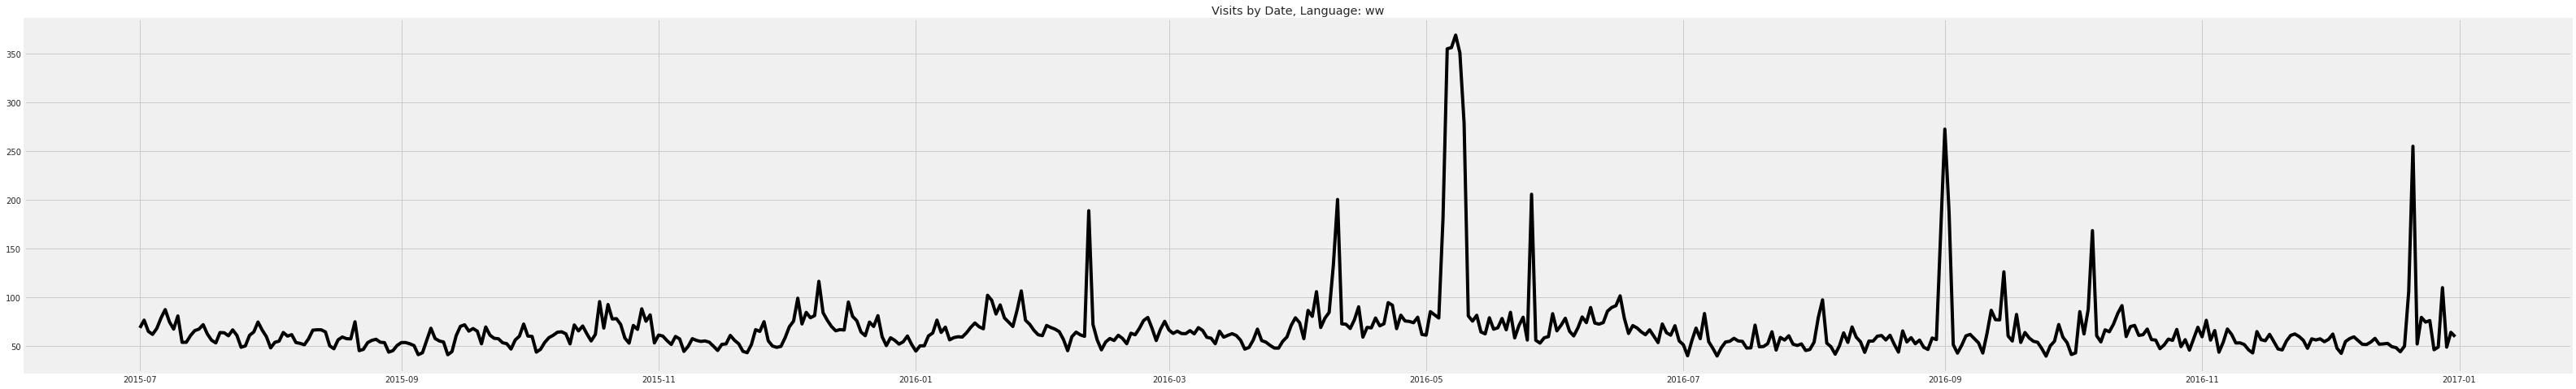

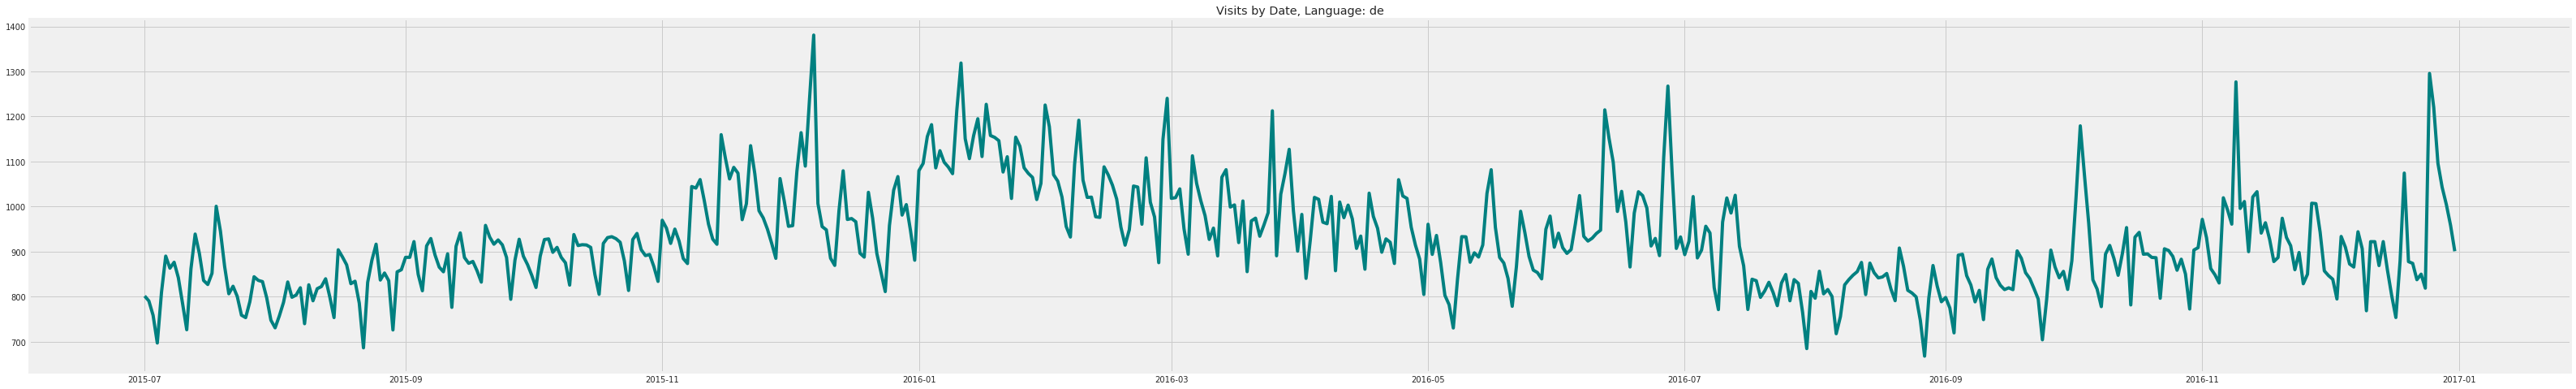

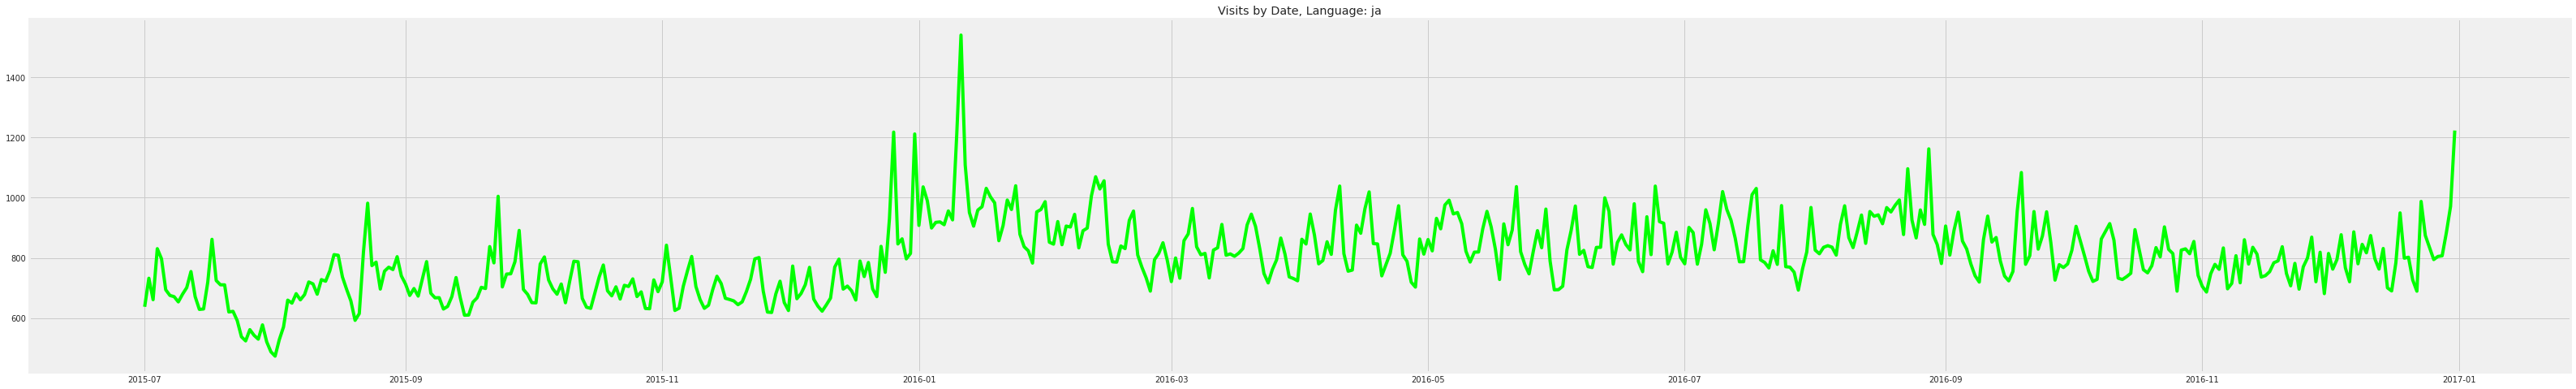

In [26]:
remove_col = ['Language', 'Name', 'Project', 'access_agent']

# List of languages 
languages = ['es', 'zh', 'fr', 'en', 'ns', 'ru', 'ww', 'de', 'ja']

color = ['b', 'r', 'c', 'g', 'm', 'y', 'k', 'teal', 'lime']
c = 0

for lang in languages:
    
    # create df
    df = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    # Call the function for visualization
    visualize_visits(pivot, 'Date', (50, 8), title=f'Visits by Date, Language: {lang}', color=color[c])
    c += 1

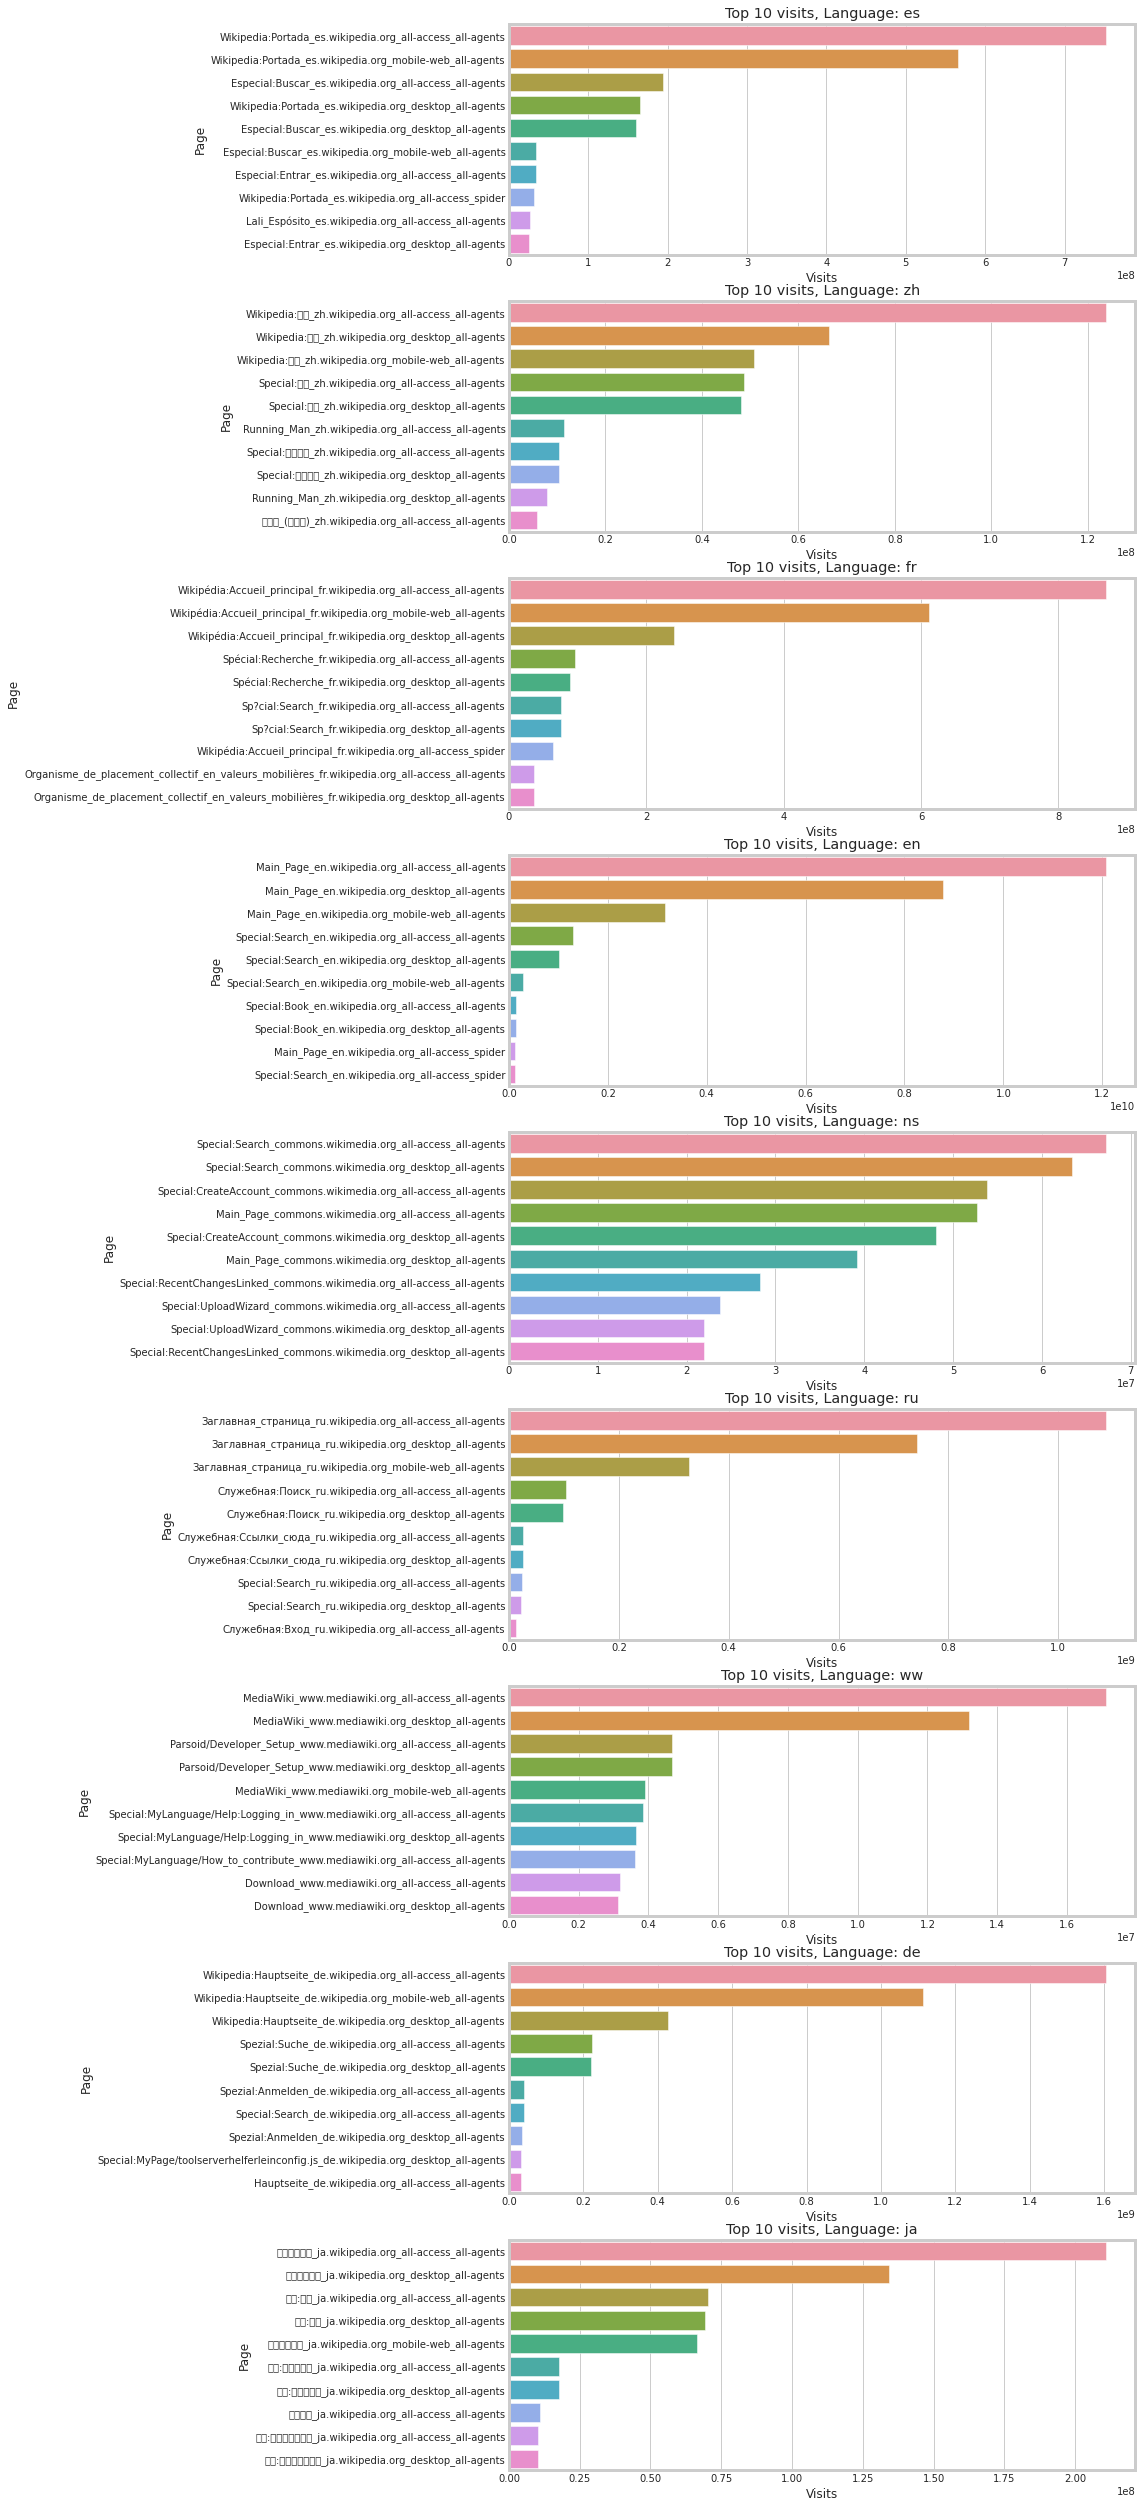

In [34]:
# Plot the 10 most visited pages according to languages
plt.figure(figsize=(10, 45))

# Top pages to show
top = 10
c = 1

for lang in languages:
    
    # create df
    df_lang = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df_lang.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    # Group the page and sum their visits
    visit_lang = pivot[['Page', 'Visits']].groupby('Page')['Visits'].sum().sort_values(ascending=False)
    visit_lang_df = pd.DataFrame({'Page':visit_lang.index, 'Visits':list(visit_lang)})
    
    # Plot the top visits
    top_visit = visit_lang_df.iloc[:top]
    plt.subplot(9, 1, c)
    title = f'Top {top} visits, Language: {lang}'
    sns.barplot(data=top_visit, y='Page', x='Visits').set_title(title);
    c += 1

## Visualize the sudden increase in visits

* From the first figure we can see that, there was sudden increase in number of visits from the date 2016-07 to 2016-09 and the similar increase in visits was also found in figure where the language was *en* and *ru*. 


<Figure size 720x1440 with 0 Axes>

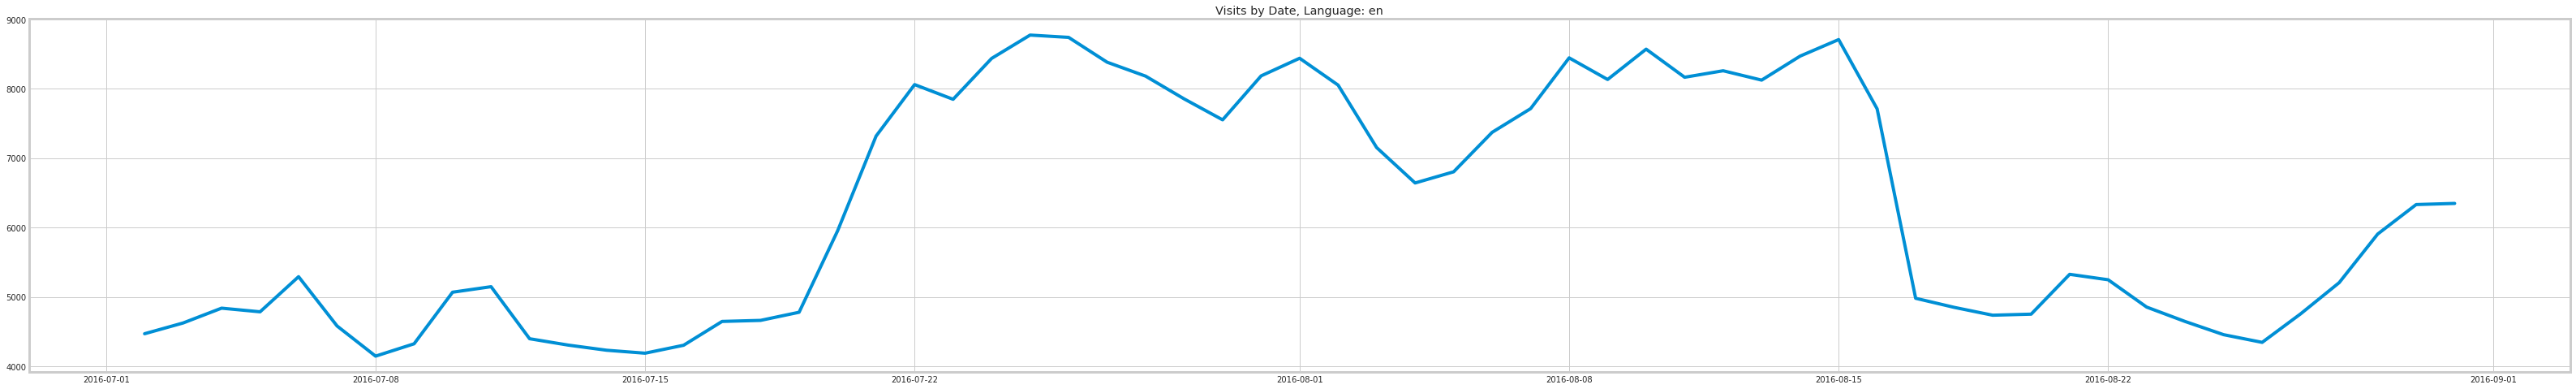

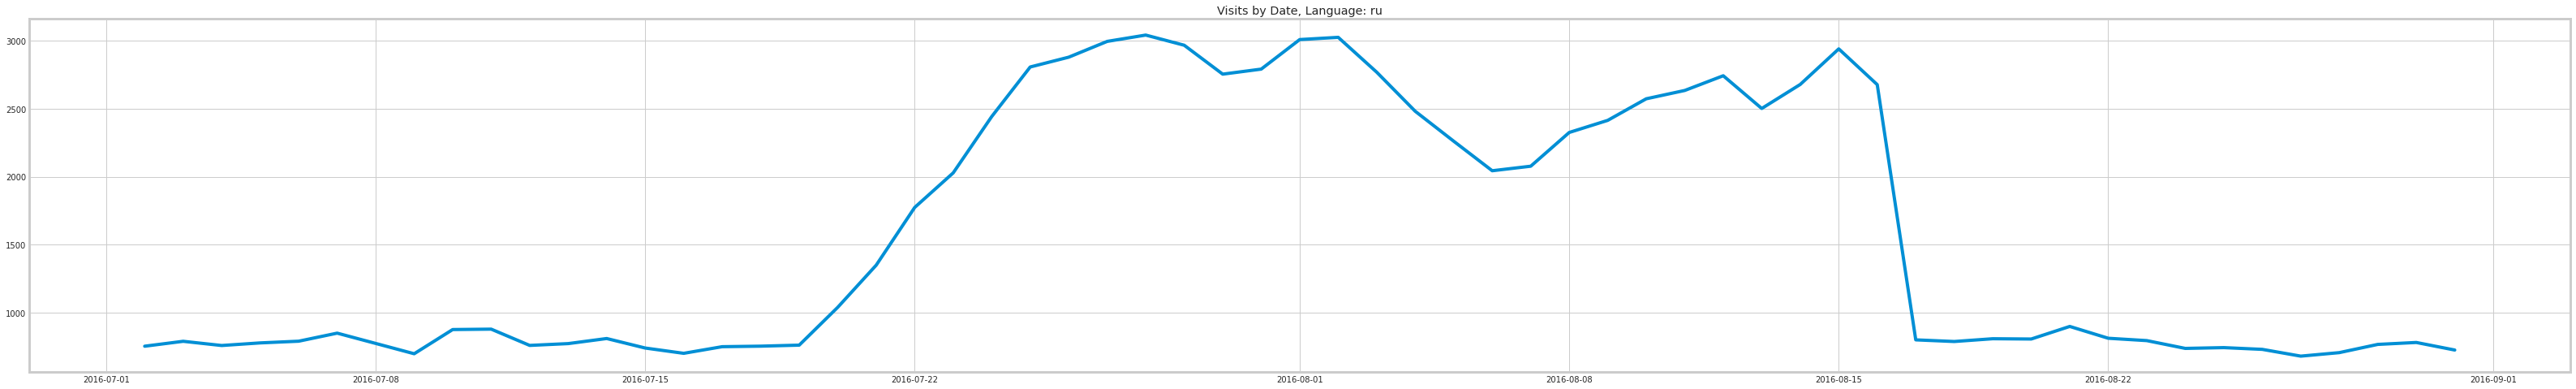

In [40]:
plt.figure(figsize=(10, 20))
top = 20
c = 1

for lang in ['en', 'ru']:
    
    df = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot = pivot[(pivot['Date'] > '2016-07-01') & (pivot['Date'] < '2016-09-01')]
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    visualize_visits(pivot, 'Date', (50, 8), title=f'Visits by Date, Language: {lang}')

* For exactly 1 month from the date 2016-07-15 to 2016-08-15 the visits were high, visualizing the top visited pages during this interval

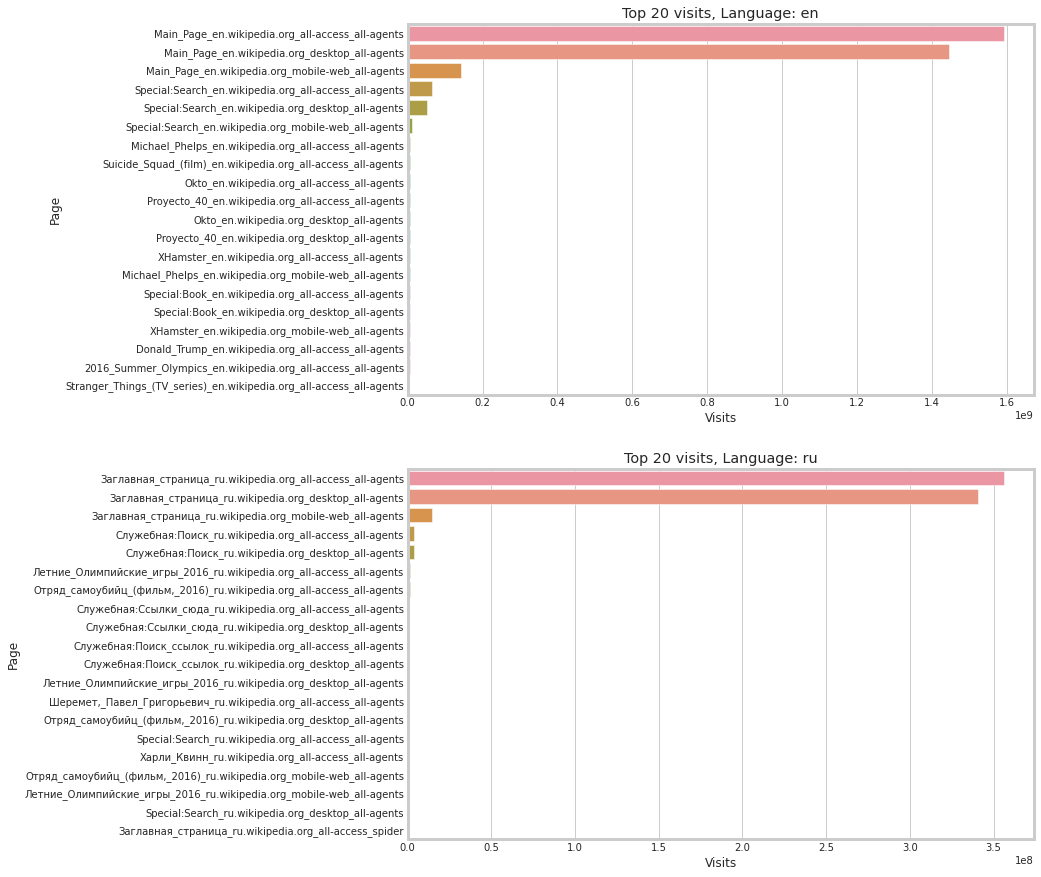

In [42]:
# Plot the 10 most visited pages according to languages
plt.figure(figsize=(10, 15))

# Top pages to show
top = 20
c = 1

for lang in ['en', 'ru']:
    
    # create df
    df_lang = train1[train1['Language'] == lang]
    
    # Drop the columns which are not required
    pv = df_lang.drop(remove_col, axis=1)
    
    # Pivot the data for visualization
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot = pivot[(pivot['Date'] > '2016-07-15') & (pivot['Date'] < '2016-08-15')]
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    
    # Group the page and sum their visits
    visit_lang = pivot[['Page', 'Visits']].groupby('Page')['Visits'].sum().sort_values(ascending=False)
    visit_lang_df = pd.DataFrame({'Page':visit_lang.index, 'Visits':list(visit_lang)})
    
    # Plot the top visits
    top_visit = visit_lang_df.iloc[:top]
    plt.subplot(2, 1, c)
    title = f'Top {top} visits, Language: {lang}'
    sns.barplot(data=top_visit, y='Page', x='Visits').set_title(title);
    c += 1

* After converting the russian webpage to english, we get that the visits were high due to summer olympics and suicide squad movie. Apart from the visits of homepage these two were common pages for both the language and therefore, this is the reason for sudden increase in visits.

## Auto correlation

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

In [46]:
acf = train_pivot[['Date', 'Visits']].groupby('Date')['Visits'].mean()

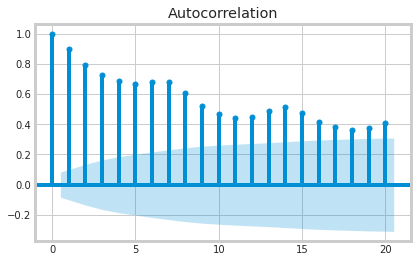

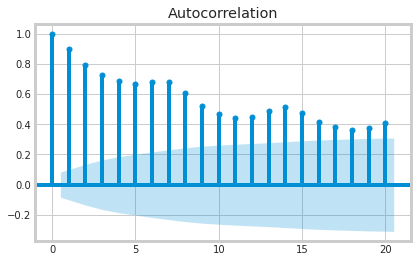

In [47]:
plot_acf(acf, lags=20)

## Partial Correlation

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf

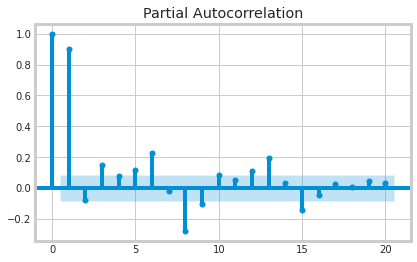

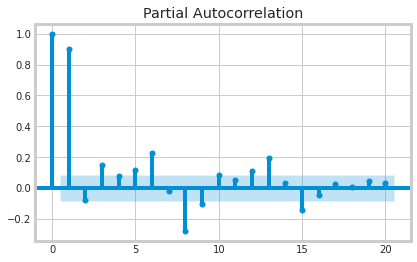

In [49]:
plot_pacf(acf, lags=20)

Observations:
* ACF plot - There is a geometric decrease in lags.
* PACF plot - There is a drop in correlation after 2 lags.